# WorkShop 4

It is the time to be a Machine Learning Engineer. Pay a lot of attention for instructions.

# Section 1

For this assignment, you will be using the _Breast Cancer Wisconsin_ (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Problem 1.1

_Scikit-learn_ works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a _DataFrame_ does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 


Convert the sklearn.dataset `cancer` to a DataFrame. 

_This function should return a_ `(569, 31)` _DataFrame with:_

```
columns = 
    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

index = RangeIndex(start=0, stop=569, step=1)
```

In [2]:
def answer_one():
    # Load the dataset
    cancer = load_breast_cancer()
    
    # Create a DataFrame from the data and feature names
    data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    
    # Add the target variable to the DataFrame
    data['target'] = cancer.target
    
    return data
print(answer_one())

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [3]:
# space for professor tests

### Problem 1.2

What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

_This function should return a Series named `target` of length 2 with integer values and index =_ `['malignant', 'benign']`

In [4]:
def answer_two():
    # Load the dataset
    cancer = load_breast_cancer()
    
    # Create a DataFrame from the data and feature names
    data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    
    # Add the target variable to the DataFrame
    data['target'] = cancer.target
    
    # Map target values to 'malignant' and 'benign'
    target_counts = data['target'].value_counts().sort_index()
    target_series = pd.Series(target_counts.values, index=['malignant', 'benign'])
    
    return target_series

print(answer_two())


malignant    212
benign       357
dtype: int64


In [5]:
# space for professor tests

### Problem 1.3

Split the DataFrame into `X` (the data) and `y` (the labels).

_This function should return a tuple of length 2: `(X, y)`, where:_

- _`X` has shape `(569, 30)`_
- _`y` has shape `(569,)`._

In [6]:
def answer_three():
    # Load the dataset
    cancer = load_breast_cancer()
    
    # Create a DataFrame from the data and feature names
    data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    
    # Add the target variable to the DataFrame
    data['target'] = cancer.target
    
    # Split into X and y
    X = data.iloc[:, :-1]
    y = data['target']
    
    return X, y

X, y = answer_three()
print(X.shape, y.shape)


(569, 30) (569,)


In [7]:
# space for professor tests

### Problem 1.4

Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

__Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!__

_This function should return a tuple of length 4: `(X_train, X_test, y_train, y_test)`, where:_

- _`X_train` has shape `(426, 30)`_
- _`X_test` has shape `(143, 30)`_
- _`y_train` has shape `(426,)`_
- _`y_test` has shape `(143,)`_

In [8]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    return X_train, X_test, y_train, y_test

# Verificación de answer_four
X_train, X_test, y_train, y_test = answer_four()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(426, 30) (143, 30) (426,) (143,)


In [9]:
# space for professor tests

### Problem 1.5

Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

_This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`._

In [10]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    # Get the training and testing data
    X_train, X_test, y_train, y_test = answer_four()
    
    # Create a KNeighborsClassifier with 1 neighbor
    knn = KNeighborsClassifier(n_neighbors=1)
    
    # Fit the classifier using the training data
    knn.fit(X_train, y_train)
    
    return knn

# Verification of answer_five
knn_model = answer_five()
print(knn_model)



KNeighborsClassifier(n_neighbors=1)


In [11]:
# space for professor tests

### Problem 1.6

Using your __knn classifier__, predict the class label using the mean value for each feature.

___Hint:___ _You can use `cancer_df.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier)._

In [12]:
def answer_six():
    # Get the trained KNeighborsClassifier
    knn = answer_five()
    
    # Load the dataset
    cancer = load_breast_cancer()
    
    # Create a DataFrame from the data and feature names
    data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
    
    # Calculate the mean value for each feature
    mean_values = data.mean().values.reshape(1, -1)
    
    # Predict the class label using the mean values
    prediction = knn.predict(mean_values)
    
    return prediction[0]

# Verification of answer_six
mean_prediction = answer_six()
print(mean_prediction)


1


c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [13]:
# space for professor tests

### Problem 1.7

Using your __knn classifier__, predict the class labels for the test set `X_test`.

_This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`._

In [14]:
def answer_seven():
    # Get the trained KNeighborsClassifier
    knn = answer_five()
    
    # Get the test data
    _, X_test, _, _ = answer_four()
    
    # Predict the class labels for the test set
    y_pred = knn.predict(X_test)
    
    return y_pred

# Verification of answer_seven
y_pred = answer_seven()
print(y_pred.shape)
print(y_pred)

(143,)
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [15]:
# space for professor tests

### Problem 1.8

Find the score (_mean accuracy_) of your __knn classifier__ using `X_test` and `y_test`.

_This function should return a float between $0$ and $1$._

In [16]:

def answer_eight():
    # Get the trained KNeighborsClassifier
    knn = answer_five()
    
    # Get the test data and labels
    X_train, X_test, y_train, y_test = answer_four()
    
    # Calculate the mean accuracy score
    accuracy = knn.score(X_test, y_test)
    
    return accuracy

# Verification of answer_eight
accuracy = answer_eight()
print(f"Mean accuracy score: {accuracy:.4f}")


Mean accuracy score: 0.9161


In [17]:
# space for professor tests

### Problem 1.9

Using the plotting function below to visualize the different predicition scores between _train_ and _test sets_, as well as malignant and benign cells.

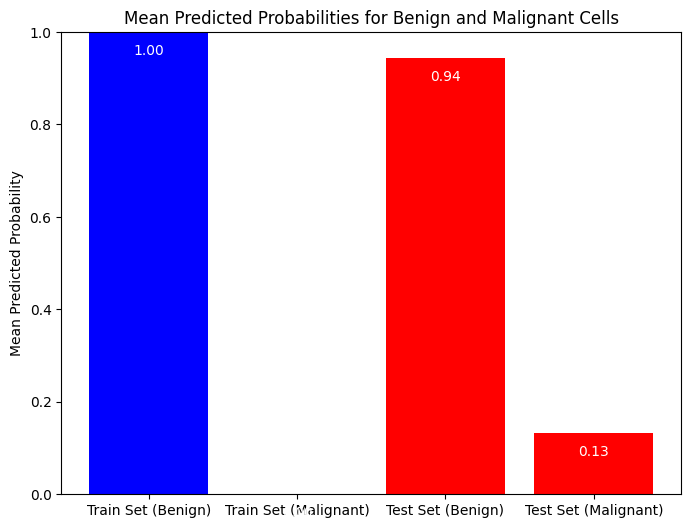

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

def plot_mean_predicted_probabilities():
    # Load the dataset
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    # Create a KNeighborsClassifier with 1 neighbor
    knn = KNeighborsClassifier(n_neighbors=1)
    
    # Fit the classifier using the training data
    knn.fit(X_train, y_train)
    
    # Predict probabilities for train and test sets
    y_train_prob = knn.predict_proba(X_train)[:, 1]
    y_test_prob = knn.predict_proba(X_test)[:, 1]
    
    # Calculate mean predicted probabilities for benign and malignant cells
    train_benign_mean = np.mean(y_train_prob[y_train == 1])
    train_malignant_mean = np.mean(y_train_prob[y_train == 0])
    test_benign_mean = np.mean(y_test_prob[y_test == 1])
    test_malignant_mean = np.mean(y_test_prob[y_test == 0])
    
    # Plotting
    labels = ['Train Set (Benign)', 'Train Set (Malignant)', 'Test Set (Benign)', 'Test Set (Malignant)']
    means = [train_benign_mean, train_malignant_mean, test_benign_mean, test_malignant_mean]
    colors = ['blue', 'blue', 'red', 'red']
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, means, color=colors)
    plt.ylabel('Mean Predicted Probability')
    plt.title('Mean Predicted Probabilities for Benign and Malignant Cells')
    plt.ylim(0, 1)  # Ensure y-axis range from 0 to 1
    
    # Add annotations on the bars
    for bar, mean in zip(bars, means):
        plt.text(bar.get_x() + bar.get_width() / 2, mean - 0.05, f'{mean:.2f}', ha='center', color='white', fontsize=10)
    
    plt.show()

# Call the function to generate the plot
plot_mean_predicted_probabilities()


## Section 2

In this case, you are going to use a _.csv_ dataset to evaluate some performance.

In [19]:
# depencencies
import numpy as np
import pandas as pd

### Problem 2.1

Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

_This function should return a float between $0$ and $1$._

In [32]:
def answer_eleven():
    # Load the dataset
    fraud_data = pd.read_csv('assets/fraud_data.csv')
    
    # Calculate the percentage of fraud observations
    fraud_percentage = fraud_data['Class'].mean()
    
    return fraud_percentage

# Call the function to calculate the percentage of fraud instances
fraud_percentage = answer_eleven()
print(f"Fraud percentage: {fraud_percentage:.4f}")



Fraud percentage: 0.0164


In [21]:
# space for professor tests

In [33]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Problem 2.2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

_This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`._

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

def answer_two_two():
    # Instantiate a dummy classifier that predicts the most frequent class
    dummy_clf = DummyClassifier(strategy='most_frequent')
    
    # Fit the dummy classifier on the training data
    dummy_clf.fit(X_train, y_train)
    
    # Calculate accuracy score
    accuracy = dummy_clf.score(X_test, y_test)
    
    # Calculate recall score
    y_pred = dummy_clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    
    return (accuracy, recall)

# Call the function to get accuracy and recall scores
accuracy, recall = answer_two_two()
print(f"Accuracy: {accuracy:.4f}, Recall: {recall:.4f}")

Accuracy: 0.9853, Recall: 0.0000


In [24]:
# space for professor tests

### Problem 2.3

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a _XGBoost_ classifer using the default parameters. What is the accuracy, recall, precision, and F1 Score of this classifier?

_This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score, f1 score)`._

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def answer_two_three():
    # Instantiate an XGBoost classifier with default parameters
    xgb_clf = XGBClassifier()
    
    # Fit the classifier on the training data
    xgb_clf.fit(X_train, y_train)
    
    # Predict labels for the test data
    y_pred = xgb_clf.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return (accuracy, recall, precision, f1)

# Call the function to get accuracy, recall, precision, and F1 score
accuracy, recall, precision, f1 = answer_two_three()
print(f"Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")


Accuracy: 0.9969, Recall: 0.8125, Precision: 0.9701, F1 Score: 0.8844


In [26]:
# space for professor tests